# Setup

In [ ]:
# !pip install -qU openai python-dotenv requests pillow

In [ ]:
from openai import OpenAI
from google.colab import userdata
import requests
import os
from PIL import Image

## Klasa CFG do konfiguracji modelu DALL-E 3

Klasa **CFG** służy jako kontener dla konfiguracji, przechowując podstawowe ustawienia dotyczące wykorzystania modelu **DALL-E 3** do generowania obrazów.

---

### 🔹 **Model:**
- **`model = "dall-e-3"`** – Określa, że będziemy używać najnowszej wersji modelu **DALL-E 3** od OpenAI.  
  - **DALL-E 3** to zaawansowany model sztucznej inteligencji, który generuje obrazy na podstawie opisów tekstowych.

---

### 🔹 **Rozmiar obrazu:**
- **`size = "1024x1024"`** – Określa wymiary generowanych obrazów (1024 piksele szerokości i 1024 piksele wysokości).  
  - Jest to standardowy rozmiar kwadratu, zapewniający wysoką jakość obrazu przy rozsądnym rozmiarze pliku.

In [3]:
class CFG:
    model = "dall-e-3"
    size = "1024x1024"

In [ ]:
from dotenv import load_dotenv

load_dotenv()

def assert_env_key(key: str | None, name: str) -> None:
    if not key:
        raise ValueError(f"{name} is not set, please update .env file")
    
OPENAI_API_KEY_NAME = "OPENAI_API_KEY"
OPENAI_API_KEY = os.getenv(OPENAI_API_KEY_NAME)
# OPENAI_API_KEY = userdata.get(OPENAI_API_KEY_NAME) # Google colab env retrieval option
assert_env_key(OPENAI_API_KEY, OPENAI_API_KEY_NAME)

client = OpenAI(api_key=OPENAI_API_KEY)

# Eksperyment

In [5]:
prompt = "Product photography, a glass ball perfume sitting on top of a tree branch,\
        with white flowers, romanticism, blue iris, beautiful lighting and shadow,\
        45 degree upward viewing angle, 4k, HD, clear details"

## Generowanie obrazów z API DALL-E 3

Ten fragment kodu służy do generowania obrazów przy użyciu API **DALL-E 3**. Przyjrzyjmy się szczegółowo, jak działa ten proces.

---

### 🔹 **Funkcja:**
- **`client.images.generate()`** – Wysyła żądanie do API OpenAI w celu wygenerowania obrazu.

---

### 🔹 **Parametry:**
- **`model = CFG.model`** – Określa, który model ma zostać użyty. W tym przypadku **DALL-E 3**, zgodnie z wcześniejszą konfiguracją w klasie **CFG**.  

- **`prompt = prompt`** – Opis tekstowy obrazu, który chcemy wygenerować.  
  - Zmienna **`prompt`** zawiera szczegóły, które model wykorzysta do stworzenia obrazu.

- **`n = 1`** – Określa, że chcemy wygenerować jeden obraz.  
  - Można także wygenerować wiele wariantów, ale w tym przypadku ograniczamy się do pojedynczego obrazu.

- **`size = CFG.size`** – Określa rozmiar generowanego obrazu (1024x1024 pikseli), zgodnie z wcześniejszą konfiguracją.

- **`response_format = "url"`** – Informuje API, że oczekujemy odpowiedzi w formie URL do wygenerowanego obrazu, zamiast danych binarnych.

---

### 🔹 **Odpowiedź:**
- Całe wywołanie zostaje zapisane w zmiennej **`generation_response`**, która zawiera odpowiedź od API.

In [6]:
generation_response = client.images.generate(
    model = CFG.model,
    prompt=prompt,
    n=1,
    size = CFG.size,
    response_format="url",
)

print(generation_response)

ImagesResponse(created=1736143114, data=[Image(b64_json=None, revised_prompt='Product photography concept showcasing a delicately crafted glass ball perfume bottle sitting gracefully atop a tree branch adorned with pristine white flowers. The image should evoke a sense of Romanticism, featuring a crystal clear blue iris as a standout detail. Beautiful, subtle lighting and shadows enhance the texture and details of the objects. The shot is taken from a 45 degree upward viewing angle to emphasize the height and majesty of the scene. Ensure the image is of 4k HD quality, capturing every minute detail in stark clarity.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-9gkTKEQ9wI8vGwHiqAoTIyb4/user-zQpPYryAUR2y615rTucDjXWc/img-wtacHDioxkMa8A15xJ4Owwnm.png?st=2025-01-06T04%3A58%3A34Z&se=2025-01-06T06%3A58%3A34Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-01-06T00%3A42%3A14

In [7]:
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [8]:
generated_image_name = "output.png"
generated_image_filepath = os.path.join(image_dir, generated_image_name)

In [ ]:
generated_image_url = generation_response.data[0].url
generated_image = requests.get(generated_image_url).content

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)

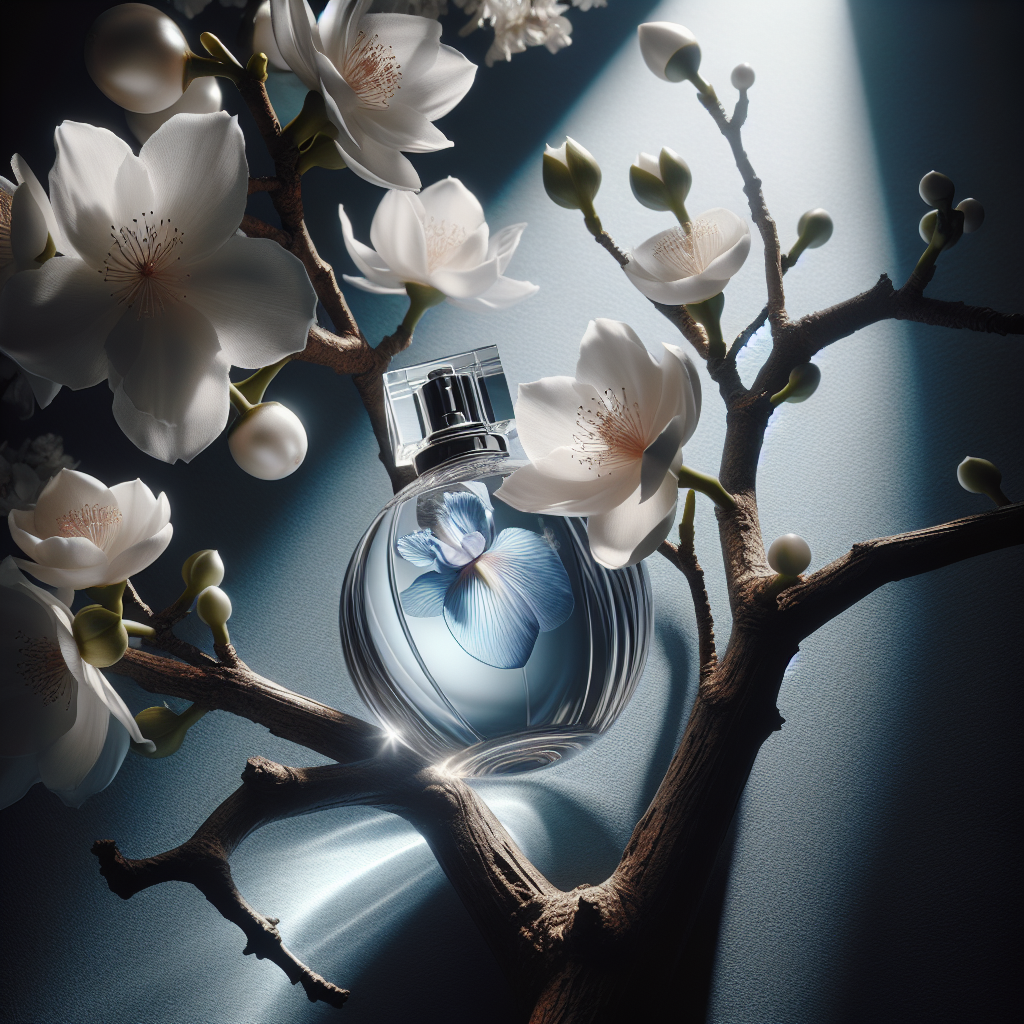

In [9]:
display(Image.open(generated_image_filepath))